In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
from tqdm import tqdm
sns.set_style('white')
sns.set_context('notebook', font_scale=1.33)
%matplotlib inline

In [3]:
## Load reject data.
reject = read_csv(os.path.join('data','reject.csv'))

## Initialize metrics DataFrame.
metrics = reject[['platform','subject','infreq']].copy()
metrics['infreq'] = np.where(metrics['infreq'] > 0, 1, 0)

In [4]:
import h5py
from pandas import DataFrame

## Extract behavior.
with h5py.File(os.path.join('stan_results',f'softmax_regression_mcmc.hdf5'), 'r') as hdf5:
    contrasts = hdf5['contrasts'][:]
    W = hdf5['W'][:]
    
W = DataFrame(W.T, columns=[f'W{i+1}' for i in range(W.shape[0])])
W['infreq'] = metrics.infreq

W = W.melt(id_vars='infreq', var_name='param', value_name='estimate')

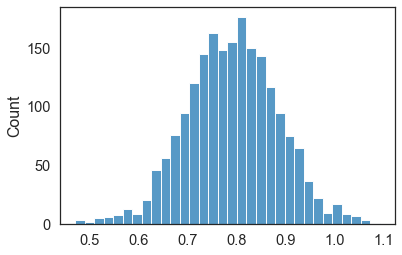

In [20]:
# sns.histplot(contrasts[:,10,0])
# sns.histplot(contrasts[:,10,1])
sns.histplot(contrasts[:,10,2])

In [ ]:
0,1,2,3,4
5,6,7,8,9

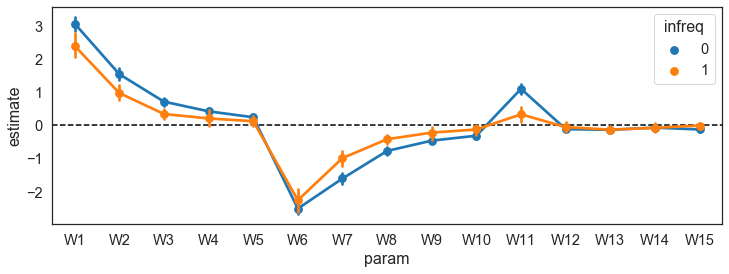

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax = sns.pointplot(x='param', y='estimate', hue='infreq', data=W, estimator=np.mean)
ax.axhline(0, linestyle='--', color='k', zorder=-1)

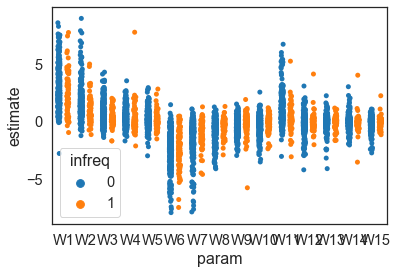

In [22]:
sns.stripplot(x='param', y='estimate', hue='infreq', data=W, dodge=True)